In [2]:
import numpy as np 
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt 

In [1]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# plot one random digital image
# plt.title('The 8th image is a {label}'.format(label=int(y[8]))) 
# plt.imshow(X[8,:].reshape((28,28)), cmap='gray')
# plt.show()

In [2]:
# reshape y to have shape (70000, 1)
y = y.reshape(-1, 1)

data = np.concatenate((y,X),axis=1)

print(data[:5,:10]) # check first 5 images and their first 9 pixels

[['5' 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 ['0' 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 ['4' 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 ['1' 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 ['9' 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]]


In [3]:
m,n = data.shape
data = np.array(data)
np.random.shuffle(data)

In [4]:
print(f"m = {m},n = {n}")

m = 70000,n = 785


In [5]:
data_dev = data[0:1000,:].T
data_train = data[1000:m,:].T

In [6]:
Y_dev = data_dev[0,:]
X_dev = data_dev[1:n,:]
Y_train = data_train[0,:]
X_train = data_train[1:n,:]
# Convert string labels to integers
Y_train = Y_train.astype(np.int64)
Y_dev = Y_dev.astype(np.int64)

X_dev = X_dev / 255.
X_train = X_train / 255.


In [7]:
X_train[:,0].shape
W1 = np.random.rand(10,784)

In [3]:
def param_init():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    # return np.exp(Z)/ sum(np.exp(Z))
    Z = np.array(Z, dtype=float)
    A = np.exp(Z) / sum(np.exp(Z))
    return A


# def softmax(Z):
#     Z = np.array(Z, dtype=float)
#     eZ = np.exp(Z - np.max(Z))
#     return eZ / np.sum(eZ, axis=0, keepdims=True)


def forward_propagation(W1,b1,W2,b2,X):
    A0 = X
    Z1 = W1.dot(A0) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    # A0 = X
    # Z1 = np.dot(W1, A0) + b1
    # A1 = ReLU(Z1)
    # Z2 = np.dot(W2, A1) + b2
    # A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot_encoder(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def backward_propagation(Z1,A1,Z2,A2,W2,X,Y):
    one_hot_Y = one_hot_encoder(Y)
    dZ2  = A2 - one_hot_Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2,axis=1).reshape(-1,1)
    dZ1 = (W2.T).dot(dZ2) * deriv_ReLU(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1,axis=1).reshape(-1,1) 
    return dW1, db1, dW2, db2


def update_params(W1,b1,W2,b2, dW1,db1, dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2

def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions,Y)
    return np.sum(predictions == Y)/ Y.size


def gradient_descent(X,Y,iterations,alpha):
    W1,b1,W2, b2 = param_init()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1,b1,W2,b2,X)
        dW1, db1, dW2, db2 = backward_propagation(Z1,A1,Z2,A2,W2,X,Y)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2, dW1,db1, dW2,db2,alpha)
        if(i % 50 == 0):
            print("Iteration : ",i)
            print("Accuracy L: ",get_accuracy(get_predictions(A2),Y))
    return W1,b1,W2,b2










In [11]:
W1,b1,W2,b2 = gradient_descent(X_train, Y_train, 500,0.1)

Iteration :  0
[0 0 0 ... 0 0 0] [9 3 2 ... 0 8 6]
Accuracy L:  0.07069565217391305
Iteration :  50
[4 3 6 ... 2 1 2] [9 3 2 ... 0 8 6]
Accuracy L:  0.42469565217391303
Iteration :  100
[4 3 6 ... 0 8 6] [9 3 2 ... 0 8 6]
Accuracy L:  0.5959420289855073
Iteration :  150
[9 3 6 ... 0 8 6] [9 3 2 ... 0 8 6]
Accuracy L:  0.6824202898550724
Iteration :  200
[9 3 2 ... 0 8 6] [9 3 2 ... 0 8 6]
Accuracy L:  0.7356811594202899
Iteration :  250
[9 3 2 ... 0 8 6] [9 3 2 ... 0 8 6]
Accuracy L:  0.7692028985507247
Iteration :  300
[9 3 2 ... 0 8 6] [9 3 2 ... 0 8 6]
Accuracy L:  0.7925507246376812
Iteration :  350
[9 3 2 ... 0 8 6] [9 3 2 ... 0 8 6]
Accuracy L:  0.8102173913043478
Iteration :  400
[9 3 2 ... 0 8 6] [9 3 2 ... 0 8 6]
Accuracy L:  0.8239275362318841
Iteration :  450
[9 3 2 ... 0 8 6] [9 3 2 ... 0 8 6]
Accuracy L:  0.8351594202898551


In [12]:
import dill
dill.dump_session('nn_fc_notebook.dill')

In [1]:
#to reload session
import dill
dill.load_session('nn_fc_notebook.dill')

In [4]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    current_image = np.array(current_image, dtype=float)
    # plt.gray()
    plt.imshow(current_image, cmap='gray')
    plt.show()


Prediction:  [1]
Label:  1


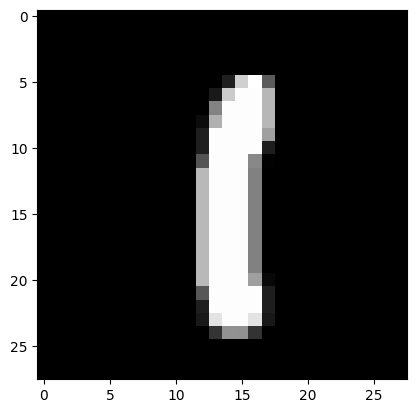

Prediction:  [5]
Label:  5


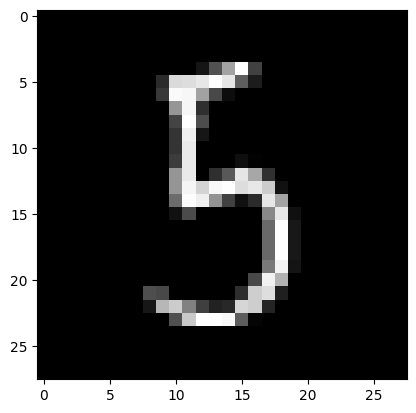

In [6]:
test_prediction(64000,W1,b1,W2,b2)
test_prediction(3,W1,b1,W2,b2)

In [8]:
dev_predictions = make_predictions(X_dev,W1,b1,W2,b2)
get_accuracy(dev_predictions,Y_dev)

[0 7 4 5 9 8 8 9 0 0 3 0 4 0 7 4 3 1 5 1 7 7 5 9 1 0 4 5 1 9 5 0 4 3 0 1 0
 3 3 1 7 4 6 9 7 3 6 4 7 2 0 2 2 8 6 8 1 7 5 0 5 9 4 4 2 4 9 1 7 9 7 8 8 7
 2 9 3 6 3 6 5 1 9 7 5 5 8 0 3 5 6 0 6 6 8 9 8 5 1 1 1 9 9 0 3 2 7 5 7 7 5
 6 6 1 9 8 8 8 7 2 2 3 1 9 2 0 3 1 5 1 4 4 9 9 0 0 6 7 5 4 8 6 4 4 1 1 8 0
 0 0 6 1 1 0 7 4 2 4 3 7 1 9 3 2 9 2 3 4 2 3 5 7 4 0 4 6 6 7 4 2 3 7 3 7 1
 1 6 5 1 7 4 2 1 4 8 1 9 0 8 9 1 0 6 8 4 0 1 0 1 7 6 7 4 7 5 8 0 9 4 9 2 5
 5 5 6 0 4 0 4 2 0 4 3 3 2 0 9 6 7 5 1 2 9 2 4 2 6 6 9 7 5 4 1 7 3 0 7 9 7
 5 2 9 0 9 1 8 7 7 9 8 0 7 5 4 3 8 6 4 3 0 3 1 7 2 3 9 3 4 5 5 0 7 8 4 2 1
 7 8 1 4 7 6 8 6 4 3 0 2 7 0 3 2 4 2 3 8 9 9 0 2 9 6 5 9 6 8 4 1 3 0 8 9 1
 7 1 3 3 7 2 5 2 8 1 4 7 8 7 0 5 2 8 9 4 1 7 2 7 9 3 8 3 7 7 1 7 4 8 6 6 3
 1 1 5 5 2 7 1 0 9 5 0 2 6 7 4 5 2 8 6 7 4 4 3 3 8 8 6 6 9 5 9 5 0 1 2 1 7
 9 0 4 5 8 5 3 2 2 9 8 6 0 1 8 0 5 0 3 6 8 9 1 5 3 4 7 7 8 5 5 1 4 2 3 3 1
 1 0 0 8 3 4 2 4 3 8 6 0 7 6 8 5 6 4 2 6 2 5 7 9 1 1 7 7 6 5 8 8 8 2 1 7 6
 8 7 0 3 8 0 8 7 6 3 6 2 

0.834